In [5]:
#데이터 준비
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

wine = pd.read_csv('https://bit.ly/wine_csv_data')
# 데이터 확인
# wine.info() # 정보
# wine.head() # 몇개의 컬럼
# wine.describe() # 개수, 평균, 표준편차, 최소, 1사분위수, --- 최대 등

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class']

train_input, test_input, train_target, test_target = train_test_split(
  data, target, random_state =42
)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 로지스틱
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target), lr.score(test_scaled, test_target)
lr.coef_, lr.intercept_




(array([[ 0.53273869,  1.67940585, -0.7090217 ]]), array([1.84713933]))

### 결정트리
- 설명가능한 AI이다
- 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 나눔
- 맨처음을 루트 노드, 맨마지막을 터미널 노드 또는 레프노드
- 사이킷런은 tree 밑에
- 회귀는 DecisionTreeRegressor()
- 특수성(기본 maxfeatures=None), 3개 사용


In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled,train_target), dt.score(test_scaled,test_target)

(0.9973316912972086, 0.8516923076923076)

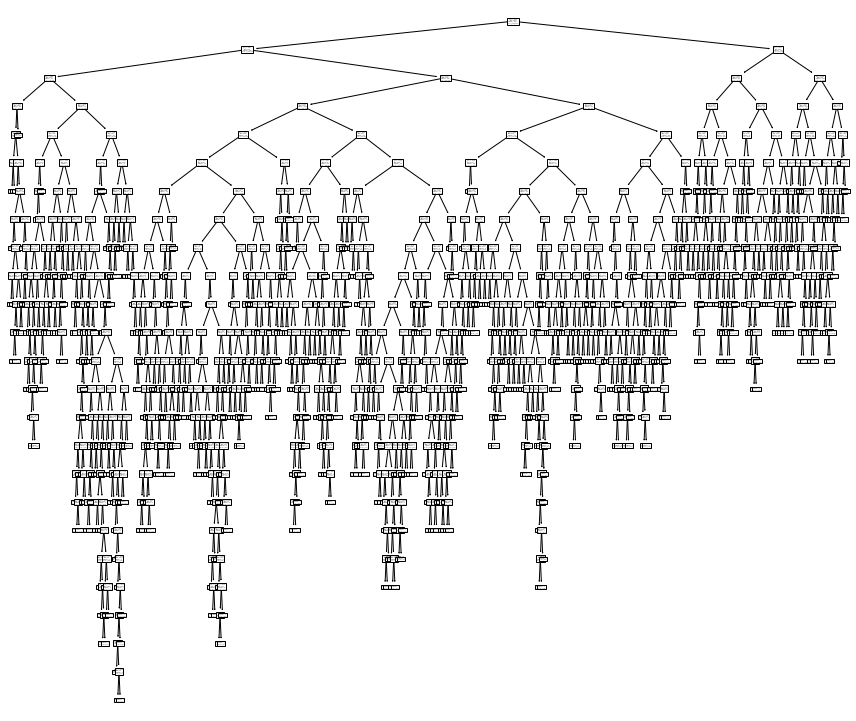

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled,train_target), dt.score(test_scaled,test_target)

# 그래프 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,13))
plot_tree(dt)
plt.show()

# 터미널 노ㅡ에서 음성, 양성 결정
# KNN과 비슷한 결과과정

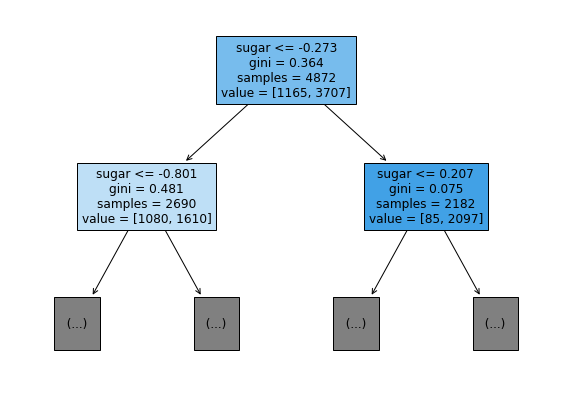

In [8]:
# plt_tree 인자를 통해 트리 출력 설정 가능
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# max_depth는 루트노드 부터 1까지(선을 브랜치(가지)라고 부름) 
# 위에는 부모노드, 밑에는 자식 노드
# filled는 노드별 음성, 양성 색상 / max_depthsms rmfovm rlfdl
# 당도가 분ㄹ에서 가장 효과적인 특징
# value는 음성, 양성의 수  0-레드 와인 1-화이트 와인
# gini는 불순도 기준

# 조건
# 불순도
# 이 클래스의 개수
# 양성/음성 클래스 개수

### 지니 불순도
- 결정트리의 분할 기준은 불순도(음성,양성이 섞여있는 정도)
- 각 노드의 복잡성 즉 불순도가 낮아지는 방향 - 순도가 높아지는 방향 
- 결정트리는 분할을 기준으로 학습 -> 회귀들이랑 다름
- 노드에서 데이터 분할 기준이 criterion 값 기본은 gini
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
  - 음성, 양성이 반반인게 가장 불순
  - 부모, 자식 노드 불순도 차이 - 정보 이득
  - 불순도 차이가 크도록 트리를 성장시킨다

### 엔트로피 불순도
- 노드에서 데이터 분할 기준인 criterion는 기본 gini외에 entropy 가 있음
- 일반적으로 기본 gini와 entropy가 만든 결과의 차이는 크지 않음
- leaf 가 순수해 질 때 까지 계속 분할
- 오버피팅 발생 가능성, 가지치기 필요

### 가지치기
- 무작정 끈까지 가지가 자라나는 트리 -> 훈련세트에서만 잘 맞는 트리 = 오버피팅
- 가지치지 중 가장 간단한 방법 - 트리의 최대 깊이를 지정해주는 것
- socre는 낮아졌지만 훈련, 데이터 셋의 차이는 줄어듦

0.8499589490968801 0.8363076923076923


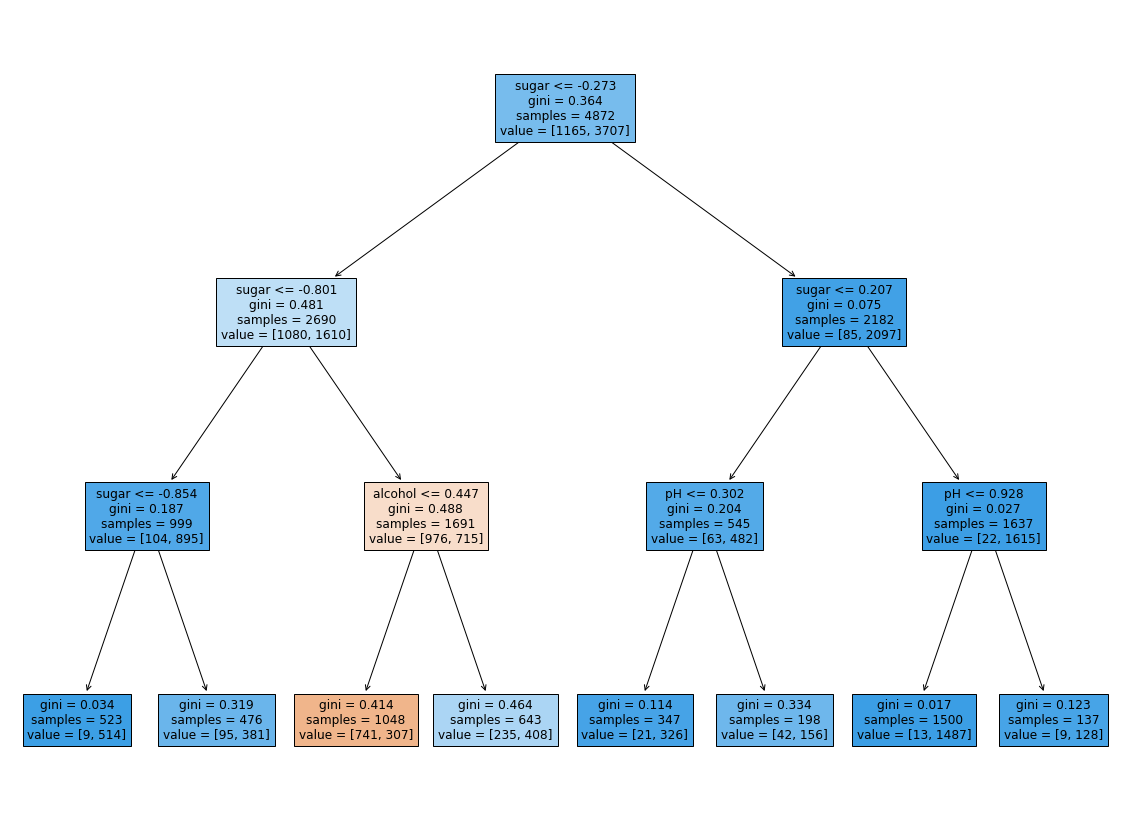

In [9]:
dt = DecisionTreeClassifier(max_depth =3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target), dt.score(test_scaled, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# depth = 1 에서 당도 기준
# depth = 2 왼쪽만 당도, 알콜, pH 사용
# depth = 3 3번째만 음성(붉은색) - 레드 와인 조건을 기술하면, -0.892<당도<-0.239이고 알콜<=0.454(당도 음수 어색함)

0.8499589490968801 0.8363076923076923


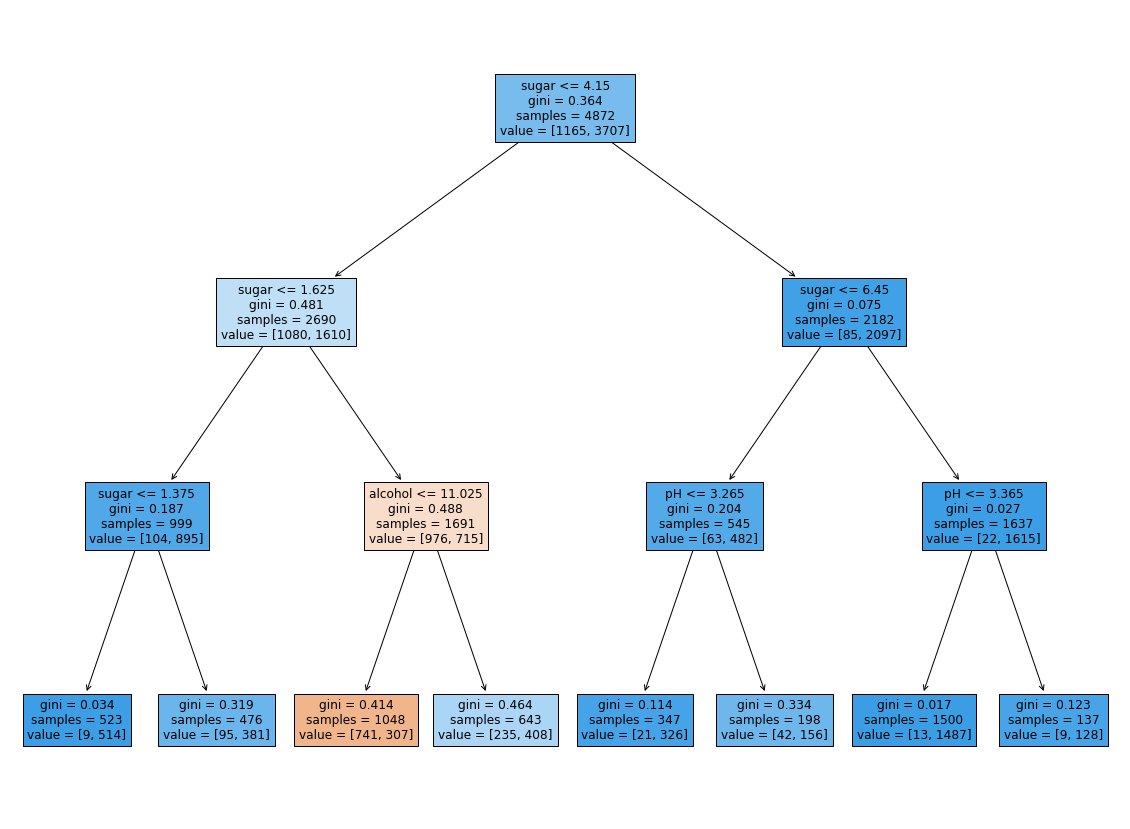

[0.12871631 0.86213285 0.00915084]


In [10]:
# 스케일하지 않은 특성 사용
dt = DecisionTreeClassifier(max_depth =3, random_state =42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target), dt.score(test_input, test_target))

plt.figure(figsize =(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# 특성 중요도
print(dt.feature_importances_)

# depth 가 낮으면 언더피팅, 높으면 오버피팅인데 이걸 해결하기 위해 앙상블 학습

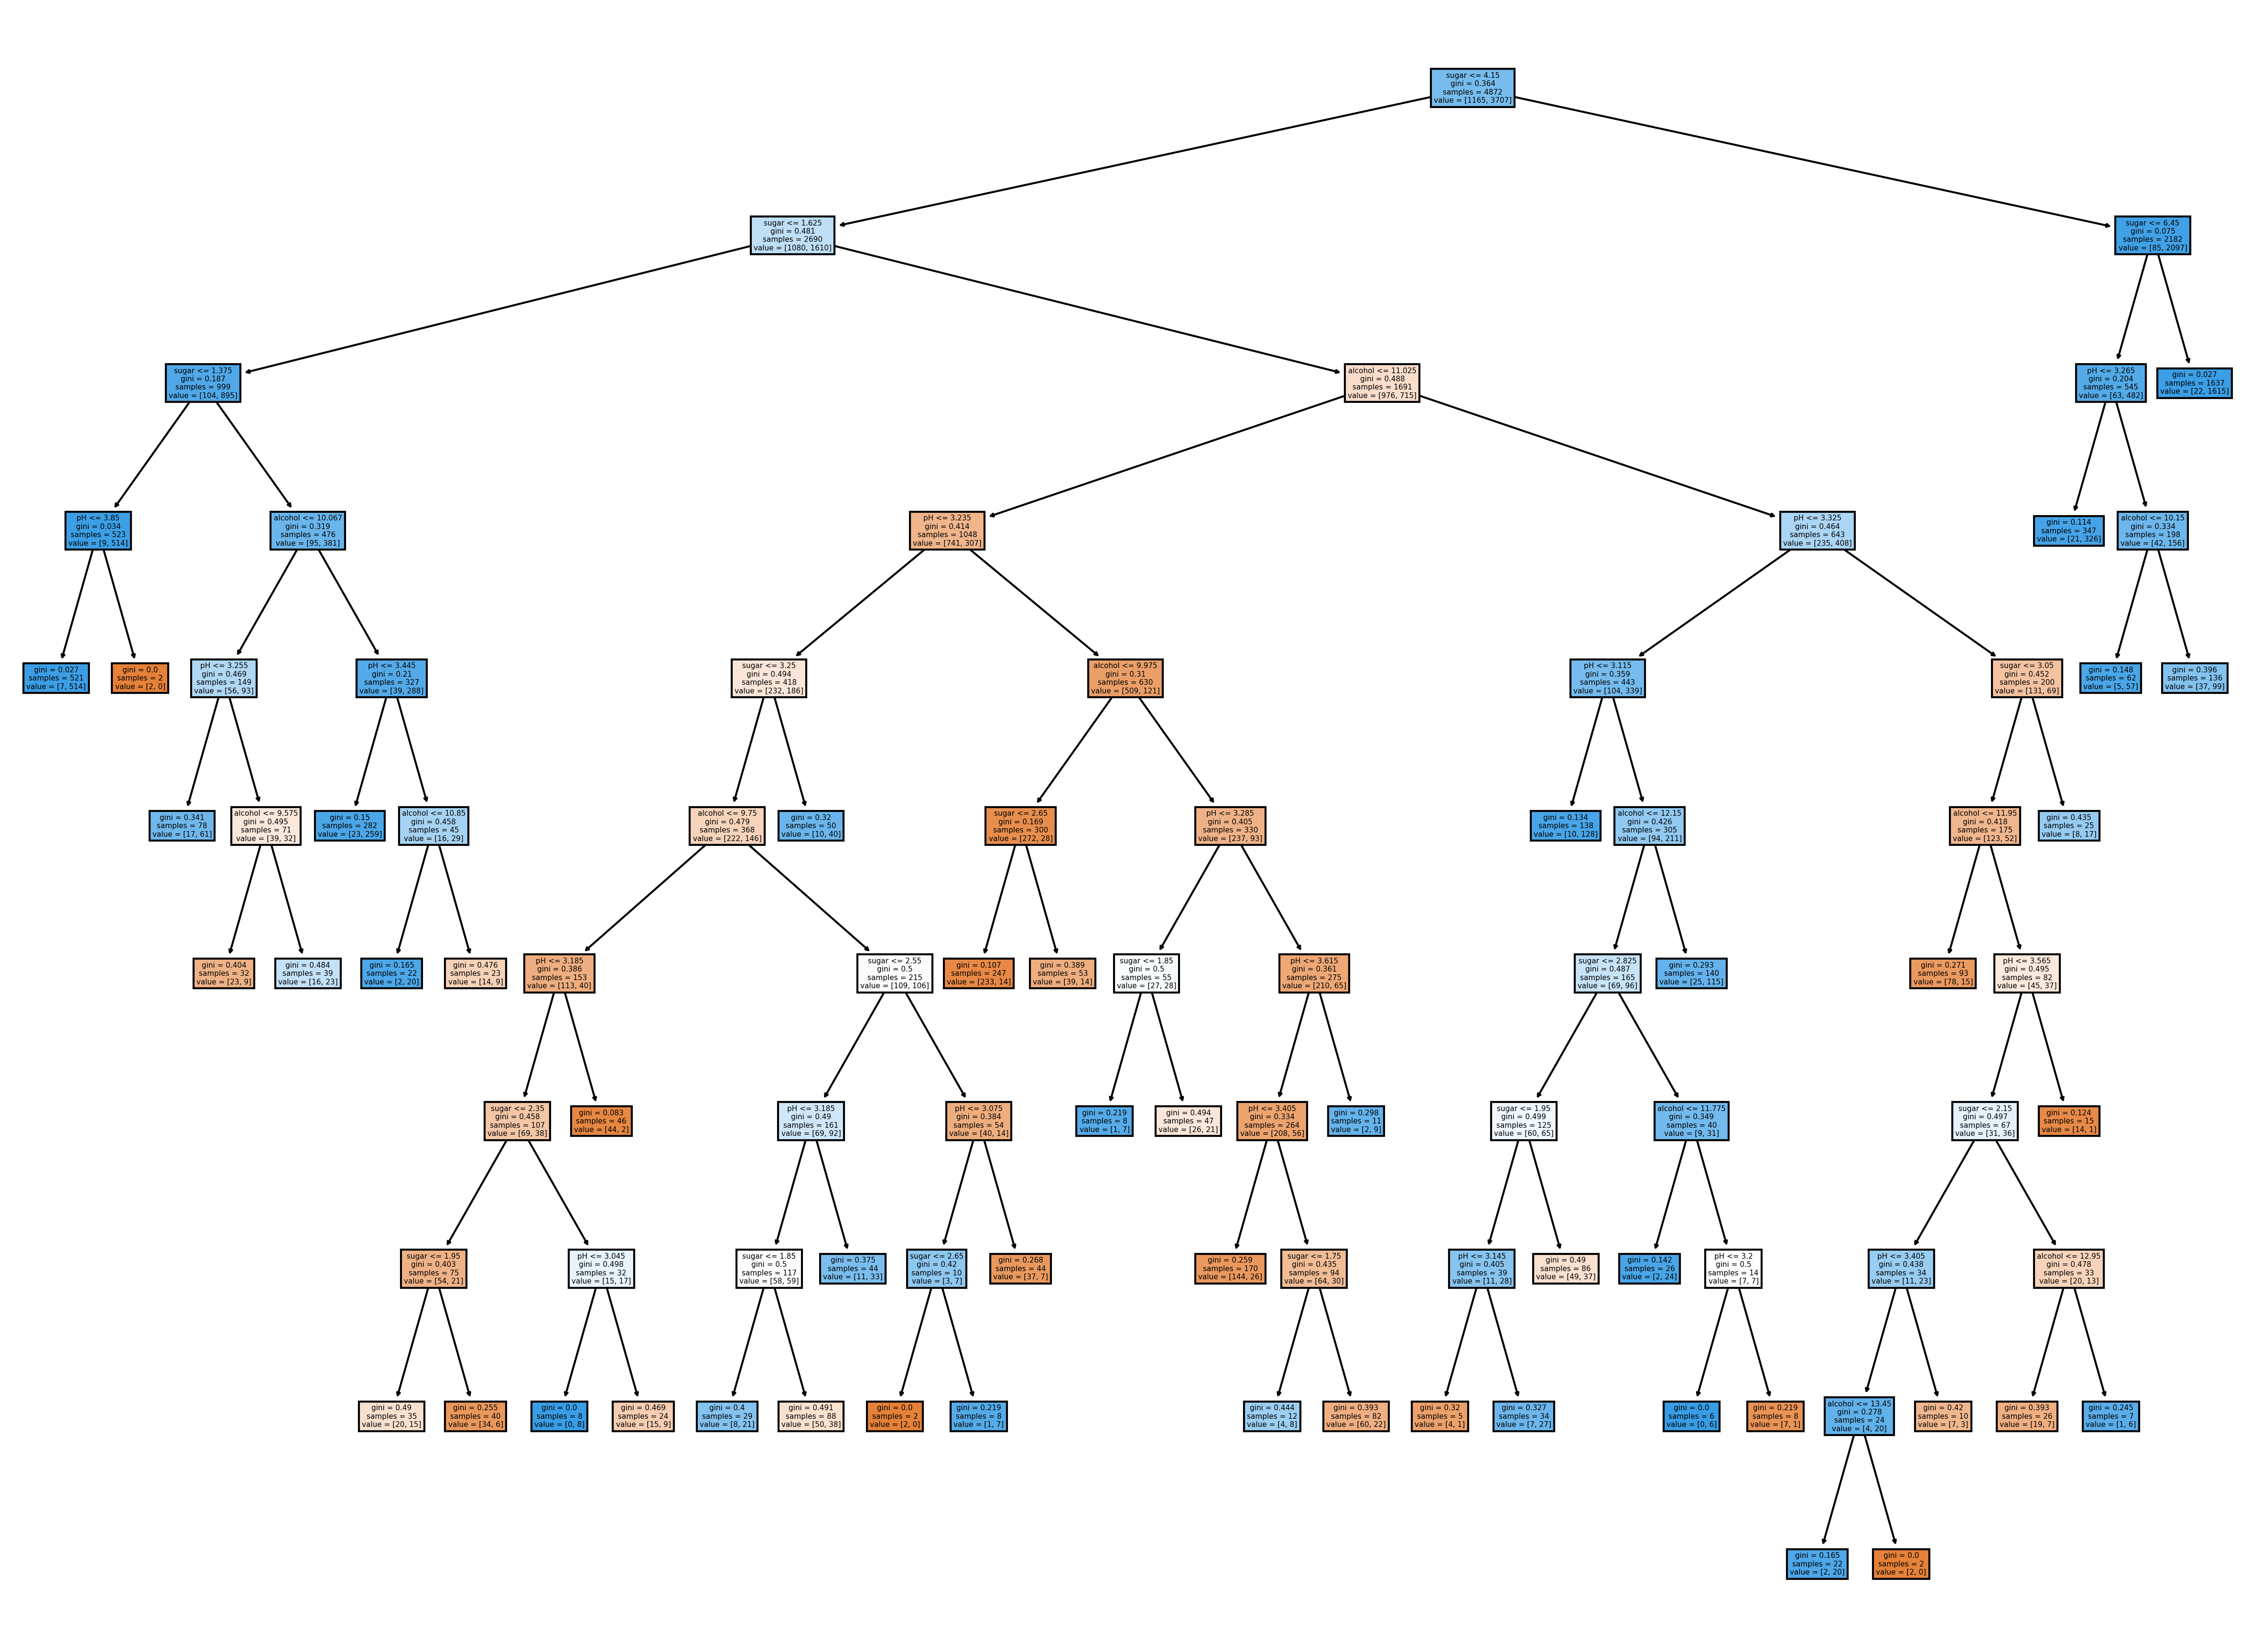

In [62]:
# 확인문제
# min_impurity_decrese 를 사용해 가지치기 함
# 어떤 노드의 정보 이득 x(노드 샘플수)/(전체 샘플수)값이 이 매개 변수 보다 작으면 더이상 문할하지 않음
# 이 매개변수 값을 0.0005로 하고 결정트리 만들기
# 좌우가 균일하지 않은 트리임? 
# 테스트 세트 성능은 어떤가?

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)
'''
(0.8975779967159278, 0.8590769230769231)
'''

plt.figure(figsize=(20,15),dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =7, min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)
# '''
# 3 - (0.8499589490968801, 0.8363076923076923)
# 4 - (0.8630952380952381, 0.8498461538461538)
# 5 - (0.8725369458128078, 0.8584615384615385)
# 6 - (0.8752052545155994, 0.8529230769230769)
# '''

for i in range(3,8):
  dt = DecisionTreeClassifier(max_depth =i, min_impurity_decrease=0.0005, random_state=42)
  dt.fit(train_input, train_target)
  print(f' max_dpth = {i} : {dt.score(train_input, train_target) - dt.score(test_input, test_target)}')
# 4로 해야지

 max_dpth = 3 : 0.013651256789187771
 max_dpth = 4 : 0.01324908424908433
 max_dpth = 5 : 0.014075407351269331
 max_dpth = 6 : 0.02228217759252249
 max_dpth = 7 : 0.031723127447265465


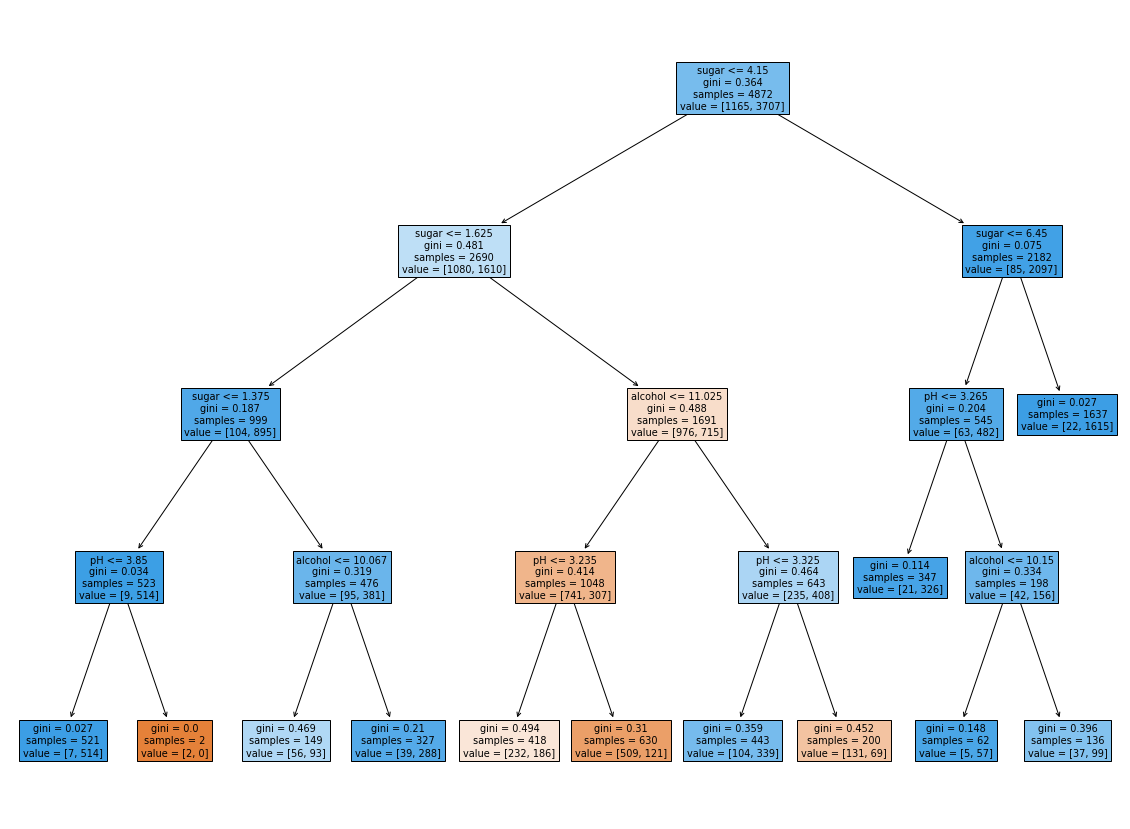

In [61]:
dt = DecisionTreeClassifier(max_depth = 4, min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()